In [19]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

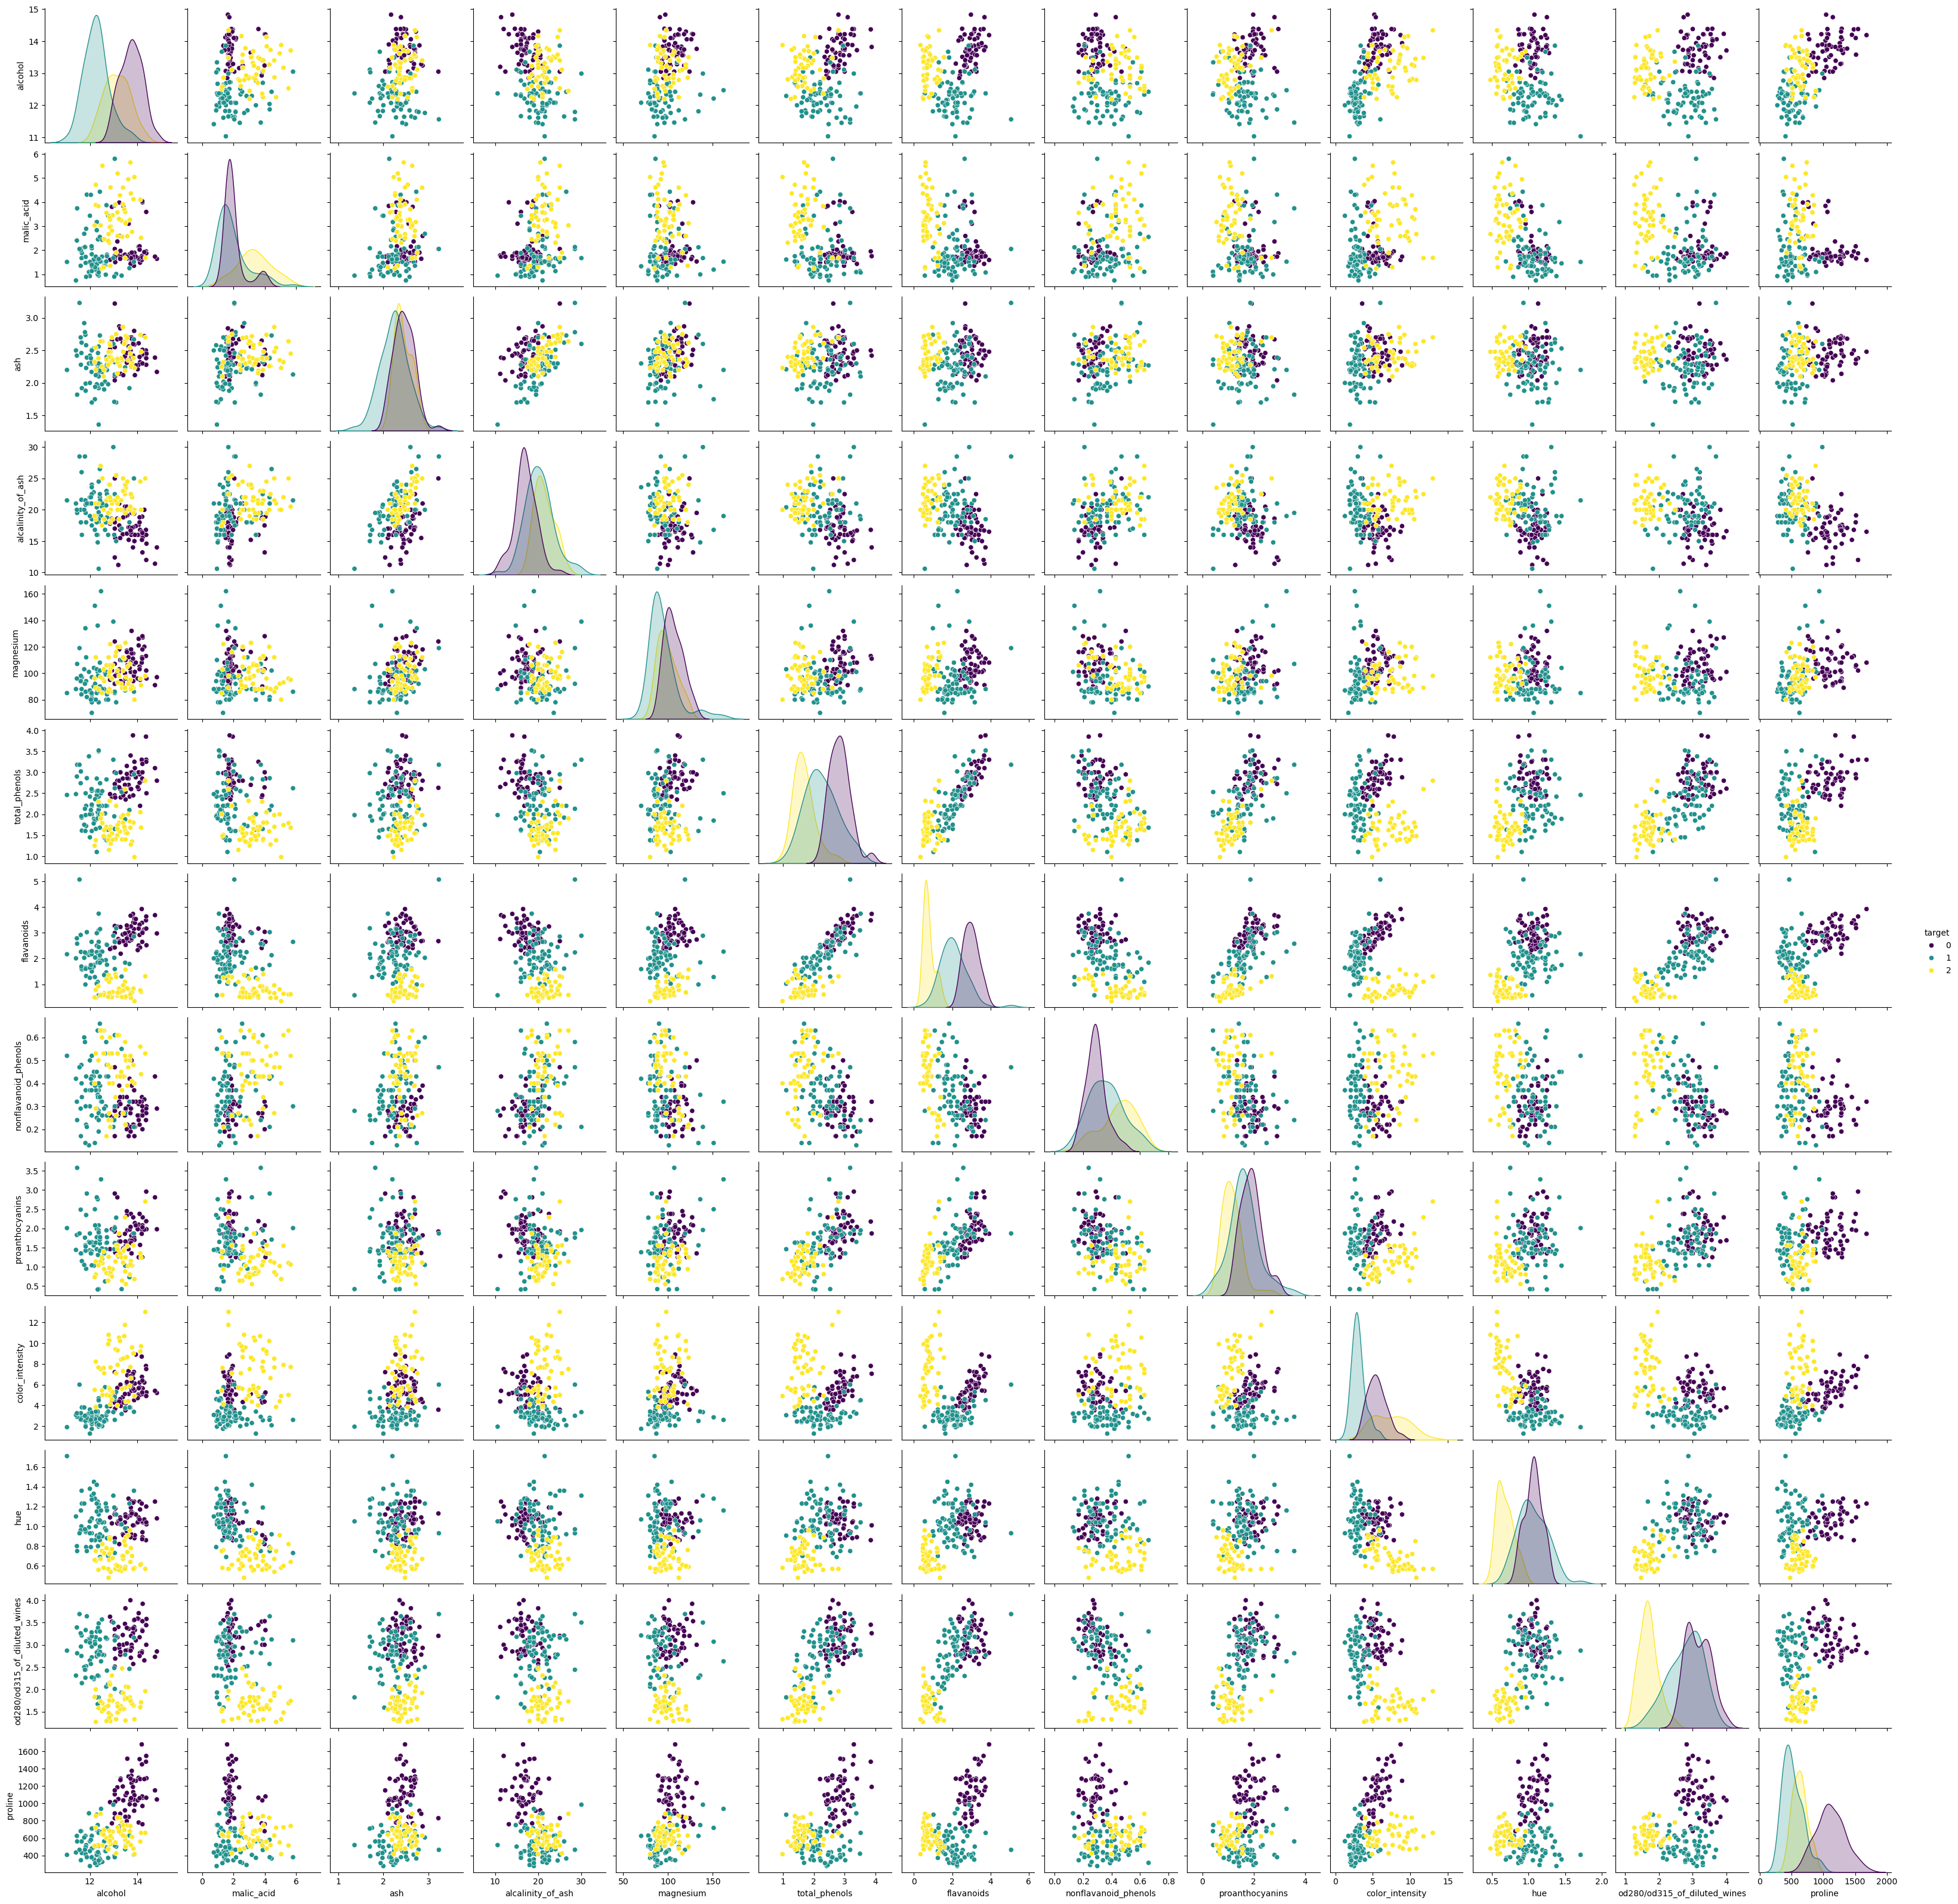

In [20]:
wine = load_wine()
X = wine.data
y = wine.target

df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = wine.target
print(df.head())

sns.pairplot(df, hue='target', palette='viridis')

In [21]:
class_labels = df['target'].unique()
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
class_labels_encoded = encoder.transform(class_labels)
df.corr()['target']

alcohol                        -0.328222
malic_acid                      0.437776
ash                            -0.049643
alcalinity_of_ash               0.517859
magnesium                      -0.209179
total_phenols                  -0.719163
flavanoids                     -0.847498
nonflavanoid_phenols            0.489109
proanthocyanins                -0.499130
color_intensity                 0.265668
hue                            -0.617369
od280/od315_of_diluted_wines   -0.788230
proline                        -0.633717
target                          1.000000
Name: target, dtype: float64

In [22]:
corr = df.corr()['target'].abs()

#Keep only highly correlated cols
filtered_cols = corr[corr > 0.5]
filtered_df = df[filtered_cols.index]

print(filtered_cols)

alcalinity_of_ash               0.517859
total_phenols                   0.719163
flavanoids                      0.847498
hue                             0.617369
od280/od315_of_diluted_wines    0.788230
proline                         0.633717
target                          1.000000
Name: target, dtype: float64


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
mlp = MLPClassifier(solver="lbfgs")
param_grid = {
    "hidden_layer_sizes": [(100,), (100, 50), (200, 100, 50)],
    "alpha": [0.0, 0.0001, 0.001],
    "max_iter": [200, 400, 800],
    "tol": [0.00005, 0.0001],
    "max_fun": [7500, 15000, 30000, 60000]
}
mlp_cv = KFold(n_splits=5)
mlp_grid = GridSearchCV(MLPClassifier(), param_grid, cv=mlp_cv)
mlp_grid.fit(X_train, y_train)
print('Best params:', mlp_grid.best_estimator_)
print('Best score:', mlp_grid.best_score_)

/usr/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: 

Best params: MLPClassifier(alpha=0.001, hidden_layer_sizes=(100, 50), max_iter=400)
Best score: 0.9928571428571429


In [27]:
y_pred = mlp_grid.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9722222222222222
Confusion matrix:
 [[11  0  0]
 [ 0 13  1]
 [ 0  0 11]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.93      0.96        14
           2       0.92      1.00      0.96        11

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

